# Exercise number 3

## Group nickname: MuonGang

### Participants:
    - Valente Alessandro 1234429
    - Ardino Rocco 1231629 
    - Paccagnella Andrea 1211171

# Index <a class="anchor" id="Ex3.i"></a>

0. [Convolutional Neural Networks - Introduction (video lessons)](#Ex3.0.)<br>
    0.1. [Data generation](#Ex3.0.1.)<br>
    0.2. [Model](#Ex3.0.2.)<br>
    0.3. [Data reshaping](#Ex3.0.3.)<br>
1. [Trials with different architectures](#Ex3.1.)<br>
    1.1. [Fitting the CNN](#Ex3.1.1.)<br>
    1.2. [Weights of the filters of the first layer](#Ex3.1.2.)<br>
2. [Confusion matrix](#Ex3.2.)<br>
3. [Regularization](#Ex3.3.)<br>
4. [Signal-to-noise ratio](#Ex3.4.)<br>

# 0. - Convolutional Neural Networks - Introduction (video lessons) <a class="anchor" id="Ex3.0."></a>
* [Index](#Ex3.i)

In [1]:
IS_LINUX = True

## 0.1. - Data generation <a class="anchor" id="Ex3.0.1."></a>

In [2]:
import random
import math 
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
random.seed(12345)
# step: dx, DX (typical scale of dx), bias (bias of dx)
# P(dx) sim exp( - |dx-bias| / DX )
# lambda 
dx = lambda DX, bias: int( (math.log(random.random()) * DX) * 2*(random.randint(0,1)-0.5) + bias)

for i in range(10): print(dx(50,5))

48
-4
12
-60
96
-1
33
29
56
-26


In [6]:
# pattern: amplitude a, number of bins z (steps)
def pattern(i,z,a):
    return int(a * math.sin((math.pi*i)/z))

[0, 48, 44, 56, -4, 92, 91, 124, 153, 209, 183, 214, 314, 236, 185, 136, 424, 442, 385, 502, 522, 524, 539, 438, 519, 457, 494, 658, 722, 821, 774, 687, 909, 931, 983, 977, 1058, 1099, 890, 839, 848, 903, 937, 907, 985, 1080, 1116, 1025, 1036, 975, 845, 893, 902, 727, 818, 909, 911, 972, 999, 1027] 0
[1027, 1046, 996, 1104, 1042, 1203, 1231, 1328, 1269, 1256, 1202, 1149, 1124, 1175, 1238, 1266, 1448, 1447, 1366, 1290, 1275, 1146, 1194, 1236, 1116, 1049, 1134, 1247, 1241, 1292, 1226, 1326, 1264, 1177, 1345, 1468, 1444, 1449, 1466, 1445, 1476, 1442, 1632, 1630, 1654, 1602, 1453, 1411, 1519, 1496, 1503, 1532, 1533, 1547, 1514, 1660, 1660, 1679, 1731, 1735] 1
[1735, 1745, 1659, 1672, 1698, 1715, 1748, 1870, 1798, 1729, 1719, 1744, 1770, 1743, 1677, 1664, 1631, 1567, 1614, 1531, 1602, 1584, 1403, 1413, 1407, 1234, 1189, 1267, 1341, 1551, 1611, 1608, 1640, 1561, 1556, 1546, 1520, 1558, 1544, 1556, 1570, 1597, 1542, 1548, 1516, 1539, 1559, 1564, 1583, 1565, 1479, 1479, 1393, 1375, 1338, 1273,

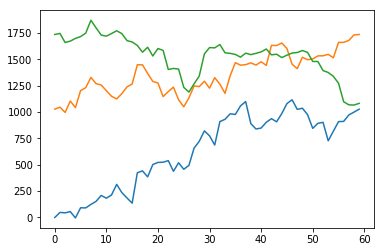

ts_L60_Z12_A25_DX50_bias5_N10000.csv


In [20]:
random.seed(12345)
# Amplitude
A = 25
# Length
Z = 12 

# sample length 
L = 60 
# number of data sample
N = 10000
# step parameters
DX = 50
bias = 5

y = [0] * N
x = [[0] * L for i in range(N)]

for i in range(N):
    if i>0: 
        x[i][0] = x[i-1][-1]
        
    for j in range(1,L):
        x[i][j] = x[i][j-1] + dx(DX,bias)
        
    y[i] = i%3
    if y[i]>0:
        j0 = random.randint(0,L-1-Z)
        sign = 3-2*y[i]
        for j in range(Z):
            x[i][j0+j] += sign*pattern(j,Z,A)
            
for i in range(3):
    print(x[i],y[i])

plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])

plt.show()
# write on csv file
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.csv'
print(str0)

fname = 'DATA/x_'+str0

os.system('rm ' + fname)
with open(fname, mode='w') as myfile:
    writer = csv.writer(myfile, delimiter=',')
    for i in range(N):
        writer.writerow(x[i])
        
fname = 'DATA/y_'+str0
os.system('rm ' + fname)
with open(fname, mode='w') as myfile:
    writer = csv.writer(myfile, delimiter=',')
    writer.writerows(map(lambda yy: [yy],y))   

In [4]:
# create folder DATA
import csv
import os
import subprocess

# linux
if IS_LINUX:
    subprocess.run(["mkdir","DATA"])

In [7]:
# write on csv file
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.csv'
print(str0)

fname = 'DATA/x_'+str0

os.system('rm ' + fname)
with open(fname, mode='w') as myfile:
    writer = csv.writer(myfile, delimiter=',')
    for i in range(N):
        writer.writerow(x[i])
        
fname = 'DATA/y_'+str0
os.system('rm ' + fname)
with open(fname, mode='w') as myfile:
    writer = csv.writer(myfile, delimiter=',')
    writer.writerows(map(lambda yy: [yy],y))    

ts_L60_Z12_A500_DX50_bias5_N10000.csv


## 0.2. - Model <a class="anchor" id="Ex3.0.2."></a>

In [8]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

Using TensorFlow backend.


10000


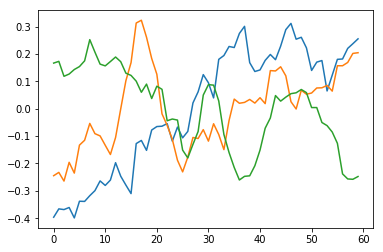

N_train = 8000    N_val = 2000    L = 60     n_class = 3


In [9]:
fnamex = 'DATA/x_'+str0
fnamey = 'DATA/y_'+str0

x = np.loadtxt(fnamex, delimiter=',', dtype=float)
N = len(x)
print(N)

xm = x.mean(axis=1)
for i in range(N):
    x[i] = (x[i]-xm[i])

sc = np.abs(x.max())
x /= sc

plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ = np.loadtxt(fnamey, delimiter=',', dtype=int)
n_class = 3

y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

perc_train = 0.8

N_train = int(N*perc_train)
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(y_val)

L = len(x[0])
print('N_train =',N_train,'   N_val =', N_val, '   L =', L,'    n_class =', n_class)

 ## 0.3. Data reshaping <a class="anchor" id="Ex3.0.3."></a>

In [10]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

# 1. - Trials with different architectures <a class="anchor" id="Ex3.1."></a>
* [Index](#Ex3.i)

In [11]:
from keras import initializers, regularizers
from keras import optimizers 

In [12]:
ini = keras.initializers.RandomNormal(mean=0,stddev=0.05,seed=12345)

NCONV = 1

model = Sequential(name='Diff_process')

if NCONV==1:
    model.add(Conv1D(filters=5, kernel_size=11, kernel_initializer=ini, #kernel_regularizer=reg, 
                     activation='relu', input_shape=input_shape))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2))
    
    
model.add(Dense(n_class, activation='softmax'))

print(model.summary())

opt = optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True, decay=1e-6)

# model: categorical
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=opt,metrics=['accuracy'])

Model: "Diff_process"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

## 1.1. - Fitting the CNN <a class="anchor" id="Ex3.1.1."></a>

In [13]:
batch_size = 500
epochs = 200

fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val), verbose=0, shuffle = True)

print('Max accuracy:', np.array(fit.history['val_accuracy']).max())

Max accuracy: 0.8495000004768372


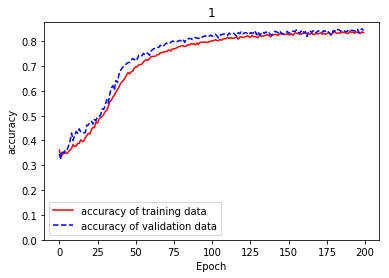

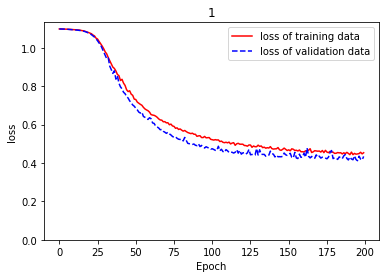

In [14]:
for obs in ('accuracy','loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r', label=obs+' of training data')
    plt.plot(fit.history['val_'+obs], 'b--', label=obs+' of validation data')
    plt.title(NCONV)
    plt.xlabel('Epoch')
    plt.ylabel(obs)
    plt.legend()
    plt.ylim(0)
    plt.show()

From the plots we can see that the model is able to obtain a decent capability of recognizing the various signal types.

The final accuracy on test is around 86% which is a good result since our model is pretty simple.

## 1.2. - Weights of the filters of the first layer <a class="anchor" id="Ex3.1.2."></a>

11
5


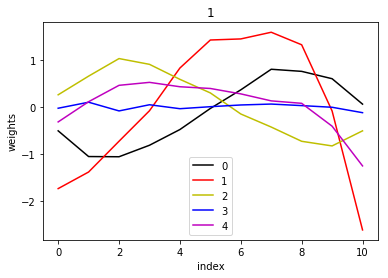

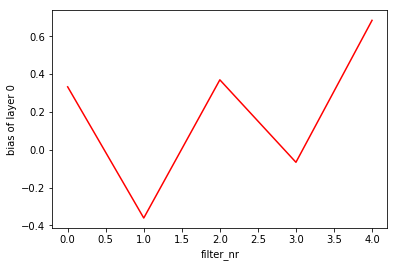

In [15]:
c = ['k','r','y','b','m']
def plot_w(w):
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0], c[i], label=str(i))
    plt.title(NCONV)
    plt.xlabel('index')
    plt.ylabel('weights')
    plt.legend()
    plt.show()
    
w0 = model.layers[0].get_weights()[0]
w01 = model.layers[0].get_weights()[1]
w0T = w0.T
print(len(w0))
print(len(w0T))
plot_w(w0T)

plt.plot(w01, 'r')
plt.xlabel('filter_nr')
plt.ylabel('bias of layer 0')
plt.show()

## 1.3 Trial with different architectures

We are now going to repeat the same procedure but using diffrent architectures of the CNN. Starting from the previous model, we tried to:
+ **(model 1)** Add a second Dense layer
+ **(model 2)** Increase the number of neurons in the Dense layer
+ **(model 3)** Add a third Conv1D layer
+ **(model 4)** Keep only one Conv1D layer (however with a number of parameters slightly greater than 600, just to experiment)

In [16]:
ini = keras.initializers.RandomNormal(mean=0,stddev=0.05,seed=12345)

In [17]:
model1 = Sequential(name='Diff_process')
model1.add(Conv1D(filters=5, kernel_size=11, kernel_initializer=ini, activation='relu', input_shape=input_shape))
model1.add(AveragePooling1D(5))
model1.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(n_class, activation='softmax'))
print(model1.summary())

model2 = Sequential(name='Diff_process')
model2.add(Conv1D(filters=5, kernel_size=11, kernel_initializer=ini, activation='relu', input_shape=input_shape))
model2.add(AveragePooling1D(5))
model2.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
model2.add(Flatten())
model2.add(Dense(14, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(n_class, activation='softmax'))
print(model2.summary())

model3 = Sequential(name='Diff_process')
model3.add(Conv1D(filters=5, kernel_size=11, kernel_initializer=ini, activation='relu', input_shape=input_shape))
model3.add(AveragePooling1D(3))
model3.add(Conv1D(filters=5, kernel_size=7 , kernel_initializer=ini, activation='relu', input_shape=input_shape))
model3.add(AveragePooling1D(2))
model3.add(Conv1D(filters=5, kernel_size=5, activation='relu'))
model3.add(Flatten())
model3.add(Dense(10, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(n_class, activation='softmax'))
print(model3.summary())

model4 = Sequential(name='Diff_process')
model4.add(Conv1D(filters=5, kernel_size=11, kernel_initializer=ini, activation='relu', input_shape=input_shape))
model4.add(AveragePooling1D(5))
model4.add(Flatten())
model4.add(Dense(10, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(n_class, activation='softmax'))
print(model4.summary())

Model: "Diff_process"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_2 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)               

In [18]:
opt = optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True, decay=1e-6)
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])

Max accuracy, model :1 0.890999972820282


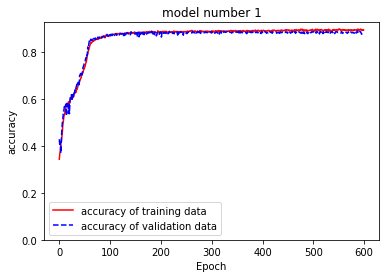

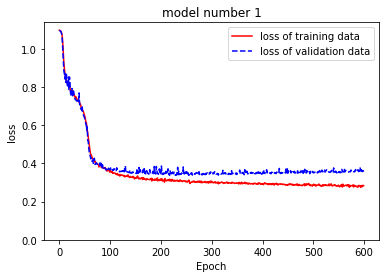

Max accuracy, model :2 0.8855000138282776


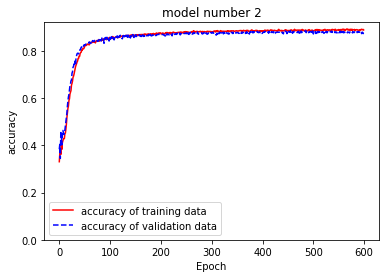

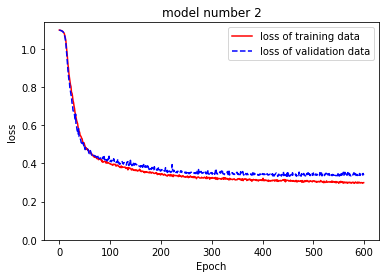

Max accuracy, model :3 0.8884999752044678


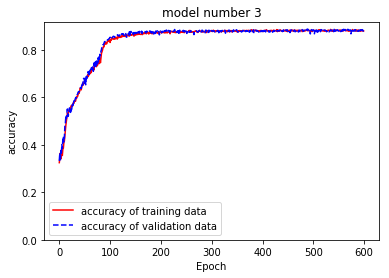

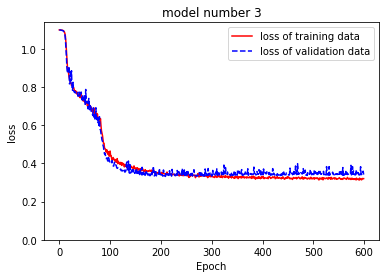

Max accuracy, model :4 0.887499988079071


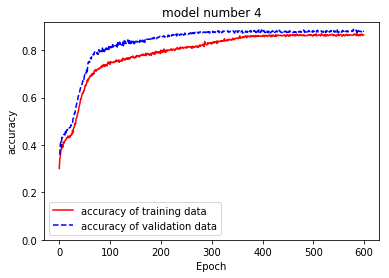

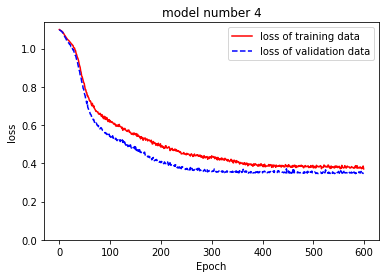

In [19]:
batch_size = 250
epochs = 600

fit1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val), verbose=0, shuffle = True)
fit2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val), verbose=0, shuffle = True)
fit3 = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val), verbose=0, shuffle = True)
fit4 = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val), verbose=0, shuffle = True)

n=0
for fit in (fit1, fit2, fit3, fit4):
    n+=1
    print('Max accuracy, model :'+str(n), np.array(fit.history['val_accuracy']).max())
    for obs in ('accuracy','loss'):
        plt.figure(figsize=(6,4))
        plt.plot(fit.history[obs], 'r', label=obs+' of training data')
        plt.plot(fit.history['val_'+obs], 'b--', label=obs+' of validation data')
        plt.title("model number "+str(n))
        plt.xlabel('Epoch')
        plt.ylabel(obs)
        plt.legend()
        plt.ylim(0)
        plt.show()

The experimented models seem to classify quite well the given data, in particular the **model3** has given the best results among the others. Moreover, it has reached convergence in a small number of epochs in comparison with the others.

# 2. - Confusion matrix <a class="anchor" id="Ex3.2."></a>
* [Index](#Ex3.i)

In [20]:
import seaborn 
from sklearn import metrics

In [21]:
y_pred = model.predict_classes(x_val)

n_classes = 3

y_val_cm = []
for i in range(len(y_val)):
    for j in range(n_classes):
        if y_val[i][j]==1:
            y_val_cm.append(j)   
                       
confusion_matrix = metrics.confusion_matrix(y_val_cm, y_pred)

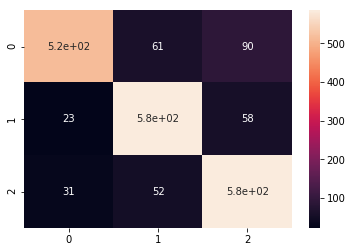

In [22]:
seaborn.heatmap(confusion_matrix, annot=True)

The confusion matrix confirms the quality of the model since it shows that the diagonal values (correct classifications) are very big compared to the off-diagonal ones.

# 3 - Regularization <a class="anchor" id="Ex3.3."></a>
* [Index](#Ex3.i)

In [23]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers

In [24]:
init = keras.initializers.RandomNormal(mean=0,stddev=0.05,seed=12345)

def compile_model(lambda_l1 = 0.0002):  
    reg = keras.regularizers.l1(lambda_l1)

    model = Sequential(name='Diff_process')
    model.add(Conv1D(filters=5, kernel_size=11, kernel_initializer=init, kernel_regularizer=reg, activation='relu', input_shape=input_shape))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(n_class, activation='softmax'))
    opt = optimizers.Nadam()
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
    return model

In [25]:
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                                   epochs=300, 
                                   batch_size=500, 
                                   verbose=0)

lambda_l1 = [0.0001,0.0002, 0.0003, 0.0005]
param_grid = dict(lambda_l1=lambda_l1)

# scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4, verbose=4)
grid_result = grid.fit(x_train,y_train)

# results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed:   43.0s remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   8 out of  16 | elapsed:   43.6s remaining:   43.6s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   58.7s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   58.9s finished


Best: 0.869000 using {'lambda_l1': 0.0003}
0.863250 (0.020434) with: {'lambda_l1': 0.0001}
0.861875 (0.014219) with: {'lambda_l1': 0.0002}
0.869000 (0.011816) with: {'lambda_l1': 0.0003}
0.863125 (0.010164) with: {'lambda_l1': 0.0005}


In [26]:
model = compile_model(grid_result.best_params_['lambda_l1'])

11
5


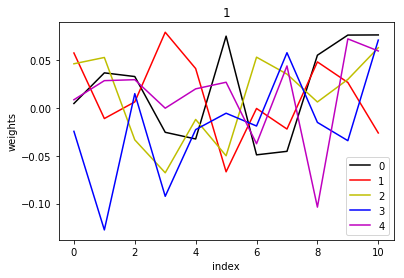

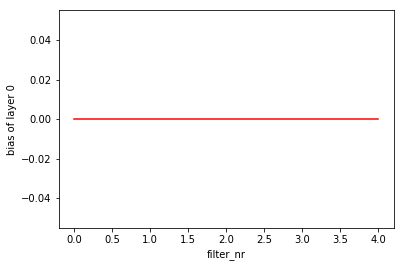

In [27]:
# Weights of the filters of the first layer
c = ['k','r','y','b','m']
def plot_w(w):
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0], c[i], label=str(i))
    plt.title(NCONV)
    plt.xlabel('index')
    plt.ylabel('weights')
    plt.legend()
    plt.show()
    
w0 = model.layers[0].get_weights()[0]
w01 = model.layers[0].get_weights()[1]
w0T = w0.T
print(len(w0))
print(len(w0T))
plot_w(w0T)

plt.plot(w01, 'r')
plt.xlabel('filter_nr')
plt.ylabel('bias of layer 0')
plt.show()

7
5


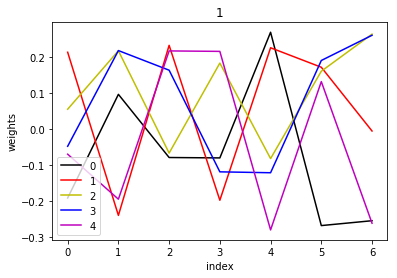

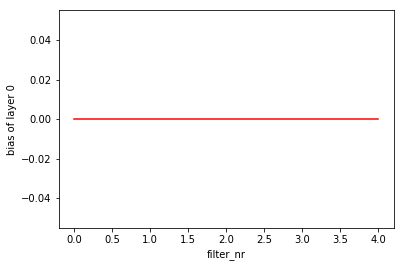

In [28]:
# Weights of the filters of the second layer
c = ['k','r','y','b','m']
def plot_w(w):
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0], c[i], label=str(i))
    plt.title(NCONV)
    plt.xlabel('index')
    plt.ylabel('weights')
    plt.legend()
    plt.show()
    
w0 = model.layers[2].get_weights()[0]
w01 = model.layers[2].get_weights()[1]
w0T = w0.T
print(len(w0))
print(len(w0T))
plot_w(w0T)

plt.plot(w01, 'r')
plt.xlabel('filter_nr')
plt.ylabel('bias of layer 0')
plt.show()

The regularization effect is visible in the values assumed by the weights (which are now assuming very small values, reduced by a factor $\sim 0.1$ or more with respect to the case without regularization) but still the result does not change a lot, this can be due to the model being pretty simple and so there is less risk of overfitting on the training set.

This is visible since, even with a grid search, the best accuracy has still a value similar to the previous one.

## 4 - Signal to noise ratio reduction <a class="anchor" id="Ex3.4."></a>
* [Index](#Ex3.i)

Max accuracy: 0.8765000104904175
Max accuracy: 0.8475000262260437
Max accuracy: 0.8134999871253967
Max accuracy: 0.7139999866485596
Max accuracy: 0.4259999990463257
Max accuracy: 0.3630000054836273
Max accuracy: 0.3634999990463257
Max accuracy: 0.35899999737739563


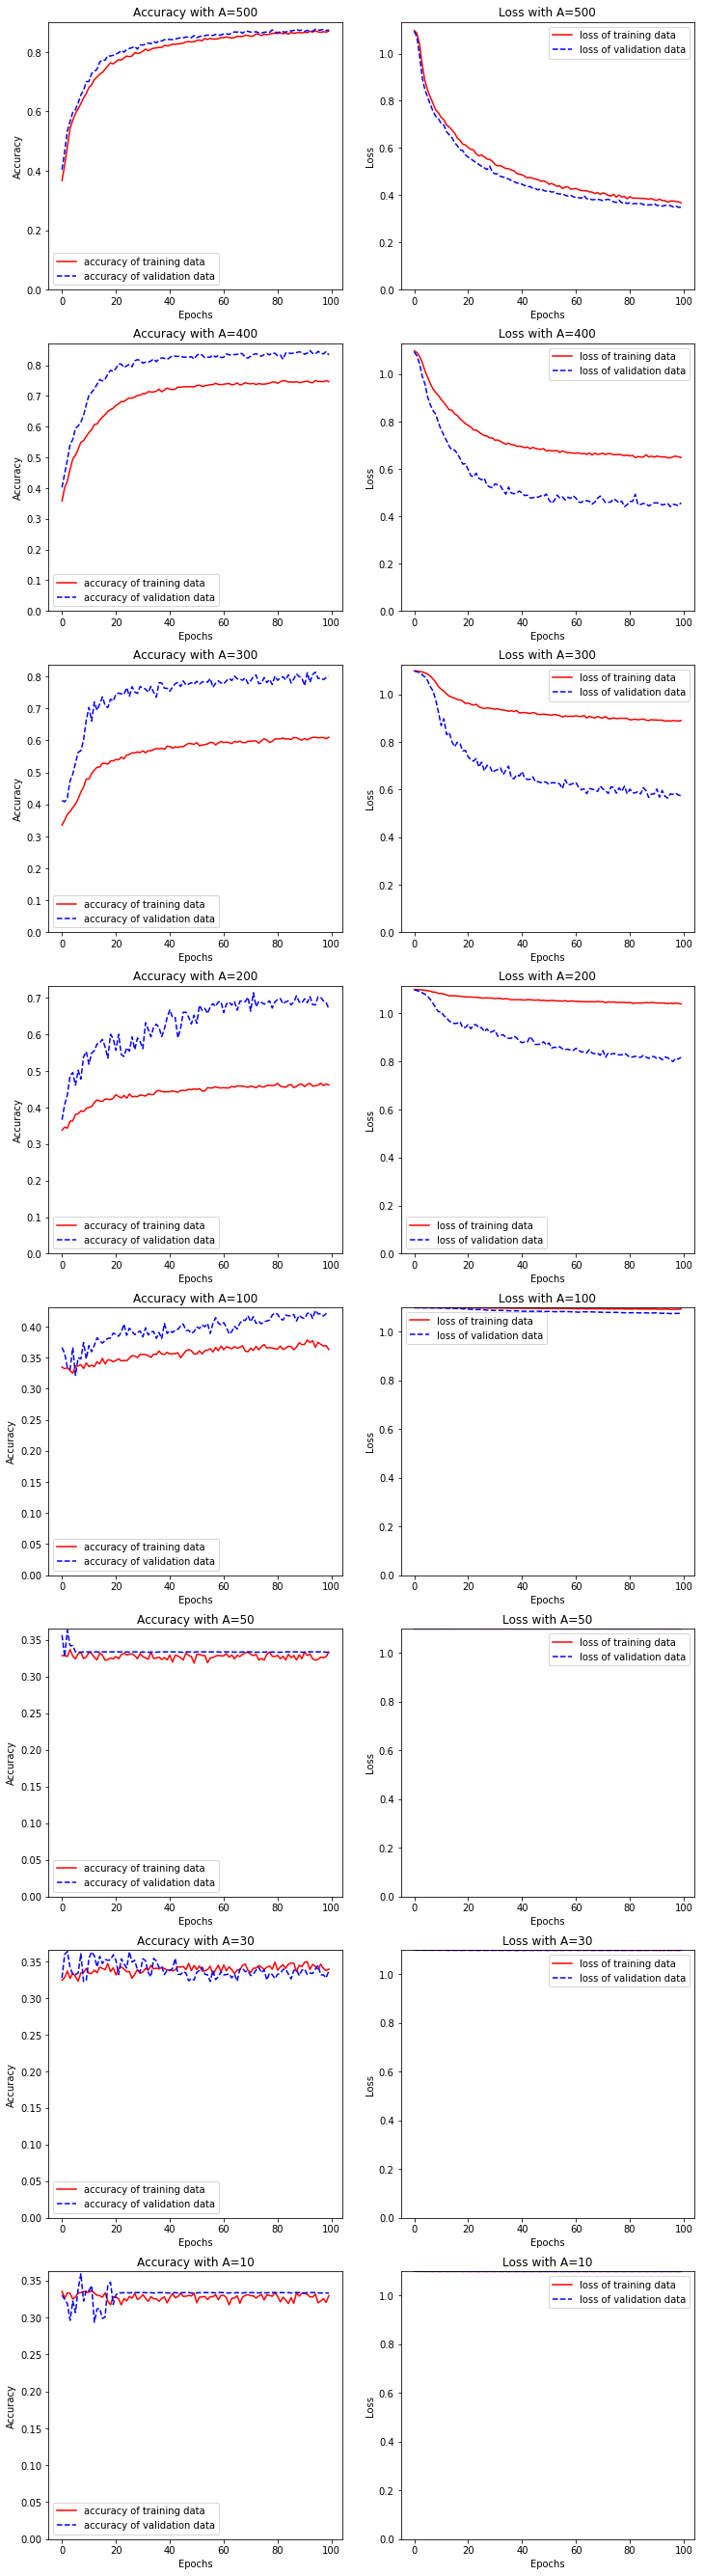

In [29]:
batch_sinze=500
epochs=100

As=[500, 400, 300, 200, 100, 50, 30, 10]
fig, ax=plt.subplots(len(As),2, figsize=(12,len(As)*6))
for z in range(len(As)):
    A=As[z]
    str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.csv'
    fnamex = 'DATA/x_'+str0
    fnamey = 'DATA/y_'+str0
    
    x = np.loadtxt(fnamex, delimiter=',', dtype=float)
    N = len(x)    
    xm = x.mean(axis=1)
    for i in range(N):
        x[i] = (x[i]-xm[i])
    sc = np.abs(x.max())
    x /= sc
    
    categ = np.loadtxt(fnamey, delimiter=',', dtype=int)
    n_class = 3
    
    y = np.zeros((N,n_class))
    for i in range(N):
        y[i][categ[i]] = 1.
    
    perc_train = 0.8
    
    N_train = int(N*perc_train)
    x_train = x[:N_train]
    y_train = y[:N_train]
    x_test = x[N_train:]
    y_test = y[N_train:]
    N_test = len(y_test)
    
    L = len(x[0])

    x_train = x_train.reshape(x_train.shape[0],L,1)
    x_test = x_val.reshape(x_test.shape[0],L,1)
    input_shape=(L,1)
    
    model = compile_model(grid_result.best_params_['lambda_l1'])
    
    fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=0, shuffle = True)
    
    print('Max accuracy:', np.array(fit.history['val_accuracy']).max())
    
    ax[z,0].plot(fit.history['accuracy'], 'r', label='accuracy of training data')
    ax[z,0].plot(fit.history['val_accuracy'], 'b--', label='accuracy of validation data')
    ax[z,0].set_title("Accuracy with A="+str(A))
    ax[z,1].plot(fit.history['loss'], 'r', label='loss of training data')
    ax[z,1].plot(fit.history['val_loss'], 'b--', label='loss of validation data')
    ax[z,1].set_title("Loss with A="+str(A))
    ax[z,0].set_xlabel("Epochs")
    ax[z,1].set_xlabel("Epochs")
    ax[z,0].set_ylabel("Accuracy")
    ax[z,1].set_ylabel("Loss") 
    ax[z,0].legend()
    ax[z,0].set_ylim(0)
    ax[z,1].legend()
    ax[z,1].set_ylim(0)

We can notice that for $A=200$ the accuracy on validation is oscillating around 0.65, meaning that the effect of the signal-to-noise ratio reduction is pretty visible.

For $A=100$ the accuracy is 0.4 so the NN is almost unable to distinguish the categories.

Below $A=50$ the accuracy is around 0.30-0.35 which is equal to a random guess since we have 3 categories.